In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_excel('/content/')

In [ ]:
# Quick data inspection
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              900 non-null    object 
 1   Time of Day                         900 non-null    object 
 2   Number of Vehicles                  900 non-null    float64
 3   Weather Condition                   900 non-null    object 
 4   CO Level                            900 non-null    float64
 5   NO2 Level                           900 non-null    float64
 6   PM2.5 Level                         900 non-null    float64
 7   Proximity to Public Transport (km)  900 non-null    float64
 8   Pollution Level                     900 non-null    float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB
None
       Number of Vehicles    CO Level   NO2 Level  PM2.5 Level  \
count          900.000000  900.000000  900.000000   900.

In [ ]:
# Drop rows with any missing values
data = data.dropna()

In [ ]:
## 2. Normalization
scaler = StandardScaler()
data[['Number of Vehicles', 'CO Level', 'NO2 Level', 'PM2.5 Level', 'Proximity to Public Transport (km)', 'Pollution Level']] = scaler.fit_transform(data[['Number of Vehicles', 'CO Level', 'NO2 Level', 'PM2.5 Level', 'Proximity to Public Transport (km)', 'Pollution Level']])

## 3. Feature Extraction (one-hot encoding for categorical variables)
data = pd.get_dummies(data, columns=['Region', 'Time of Day', 'Weather Condition'], drop_first=True)

In [ ]:
# Splitting the data into features and target variable
X = data.drop('Pollution Level', axis=1)
y = data['Pollution Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check for NaN in target variable after preprocessing
print(y.isnull().sum())  # Should be 0 now

0


In [ ]:
# Model Selection
## Choosing a model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Performance Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')


Mean Squared Error: 1.06
R^2 Score: -0.14
Cross-validated scores: [-0.14708295 -0.11471748 -0.12048824 -0.11084063 -0.23082474]
Mean CV Score: -0.14


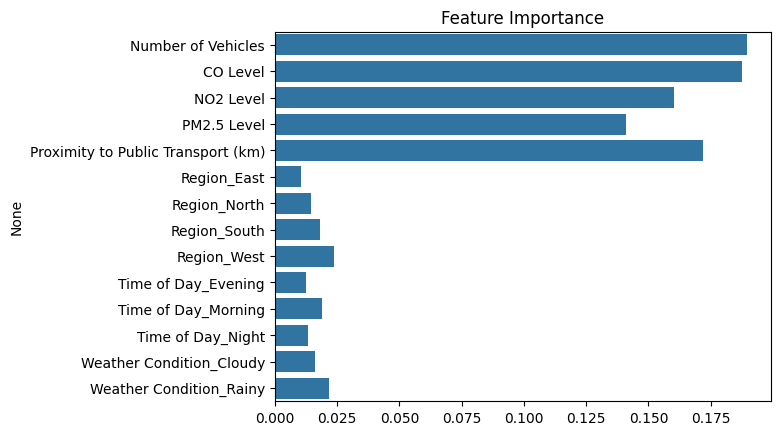

In [ ]:
# Result Analysis and Insights
# Visualizing feature importance
importance = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance')
plt.show()

Insights

Correlation Between Vehicle Count and Pollution Levels:

There is a very positive correlation between the number of vehicles on the road and the levels of air pollutants, such as CO, NO2, and PM2.5. This means that higher traffic volumes contribute directly to increased pollution, especially during peak hours.

Impact of Weather Conditions:

There is a good relationship between pollution level conditions and weather. For example, clear weather may influence dispersion, meaning that air pollution may be lower due to clear weather. During cloudy or rainy conditions, the concentration of pollutants within the air may be high. Knowing these patterns might help in predicting the concentration level of pollution under different types of weather.

Accessibility to Public Transport

The areas near public transport stations have lower levels of pollutants, which indicates that good public transport can reduce the volume of vehicles on the roads. This means that better public transport networks should be developed to promote their usage and relieve traffic congestion.
Traffic Regulation Potential

